In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import export_graphviz

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [15]:
dataset = pd.read_csv('E:/diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [17]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Understanding the data


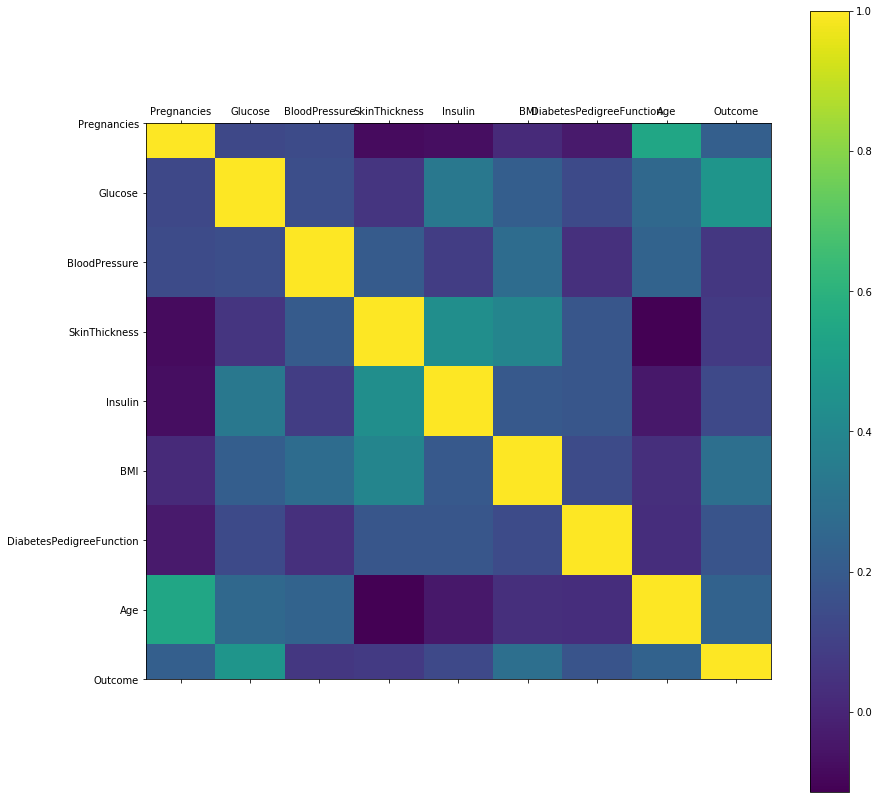

In [18]:
rcParams['figure.figsize'] = 20, 14
plt.matshow(dataset.corr())
plt.yticks(np.arange(dataset.shape[1]), dataset.columns)
plt.xticks(np.arange(dataset.shape[1]), dataset.columns)
plt.colorbar()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D482835AC8>,
      dtype=object)

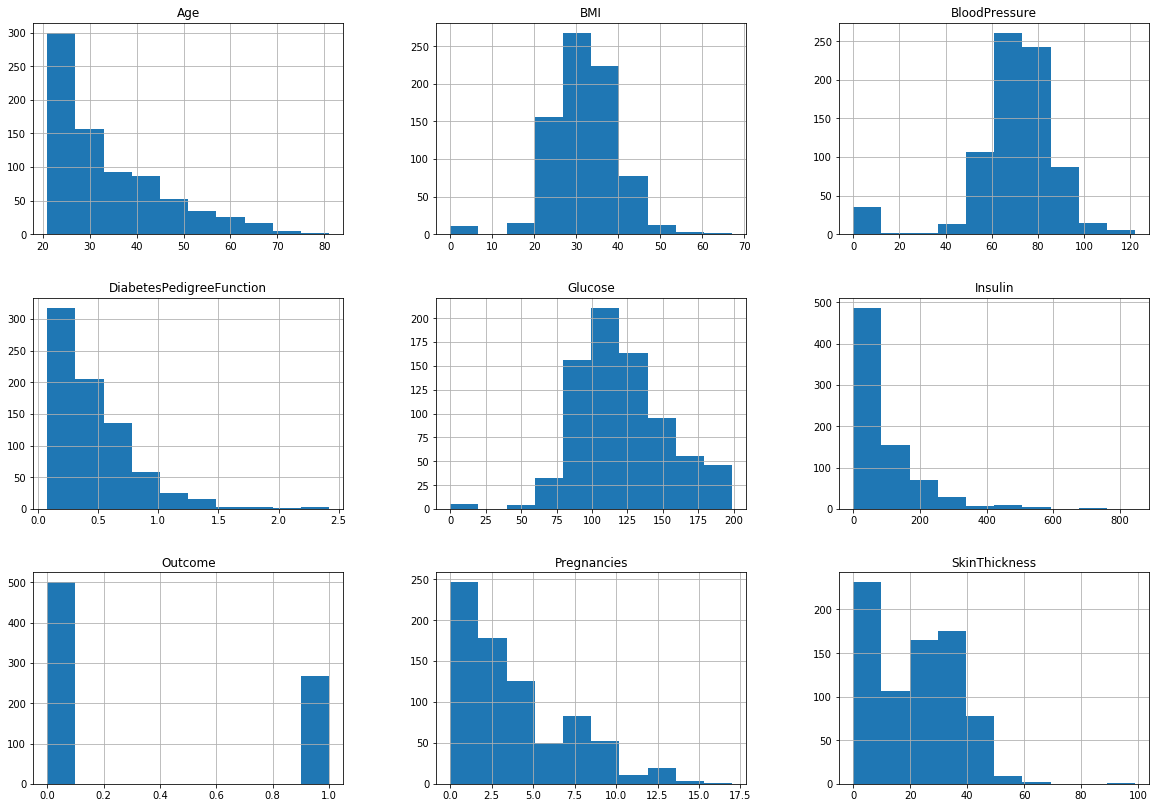

In [19]:
dataset.hist()


Text(0.5, 1.0, 'Count of each Outcome Class')

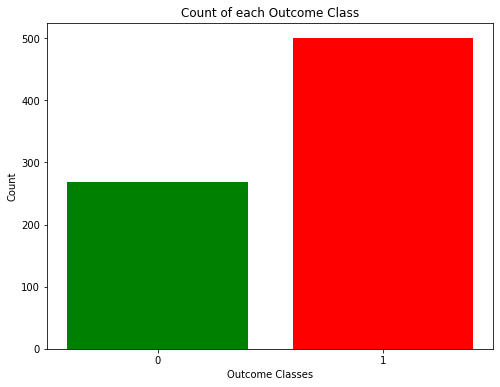

In [20]:
rcParams['figure.figsize'] = 8,6
plt.bar(dataset['Outcome'].unique(), dataset['Outcome'].value_counts(), color = ['red', 'green'])
plt.xticks([0, 1])
plt.xlabel('Outcome Classes')
plt.ylabel('Count')
plt.title('Count of each Outcome Class')

In [4]:
import pandas as pd

dataset = pd.read_csv('E:/diabetes.csv')
# Computing the %age of diabetic and non-diabetic in the sample
Out0=len(dataset[dataset.Outcome==1])
Out1=len(dataset[dataset.Outcome==0])
Total=Out0+Out1
PC_of_1 = Out1*100/Total
PC_of_0 = Out0*100/Total
PC_of_1, PC_of_0

(65.10416666666667, 34.895833333333336)

Text(0.5, 1.0, 'Boxplot for Preg by Outcome')

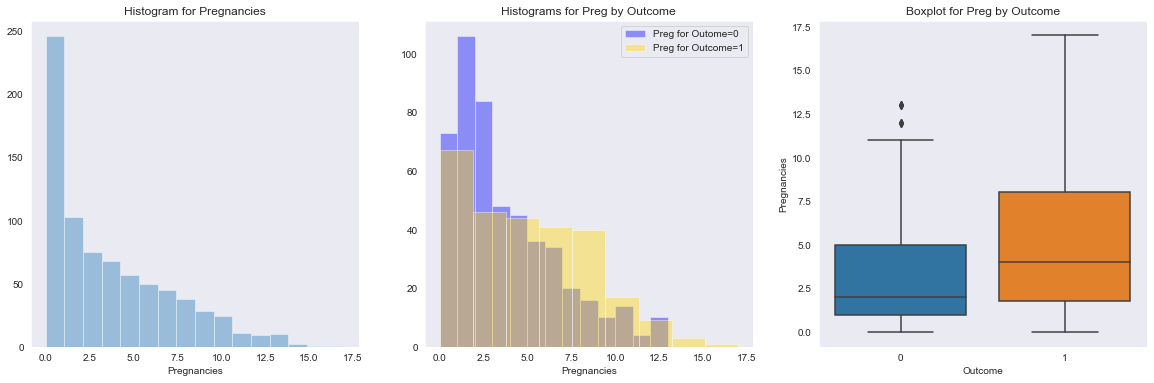

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
dataset1 = dataset[dataset.Outcome==1]
dataset0 = dataset[dataset.Outcome==0]
## Creating 3 subplots - 1st for histogram, 2nd for histogram segmented by Outcome and 3rd for representing same segmentation using boxplot
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Pregnancies")
sns.distplot(dataset.Pregnancies,kde=False)
plt.subplot(1,3,2)
sns.distplot(dataset0.Pregnancies,kde=False,color="Blue", label="Preg for Outome=0")
sns.distplot(dataset1.Pregnancies,kde=False,color = "Gold", label = "Preg for Outcome=1")
plt.title("Histograms for Preg by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=dataset.Outcome,y=dataset.Pregnancies)
plt.title("Boxplot for Preg by Outcome")

Text(0.5, 1.0, 'Boxplot for Glucose by Outcome')

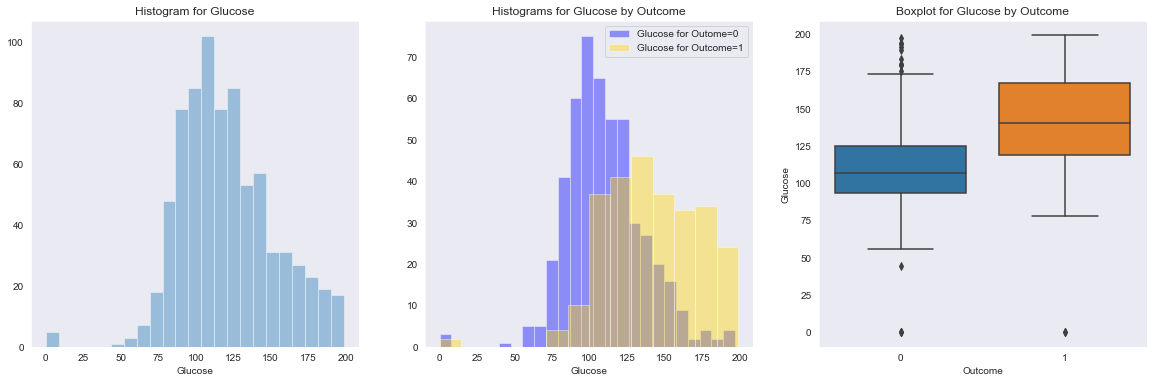

In [10]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for Glucose")
sns.distplot(dataset.Glucose,kde=False)
plt.subplot(1,3,2)
sns.distplot(dataset0.Glucose,kde=False,color="Blue", label="Glucose for Outome=0")
sns.distplot(dataset1.Glucose,kde=False,color = "Gold", label = "Glucose for Outcome=1")
plt.title("Histograms for Glucose by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=dataset.Outcome,y=dataset.Glucose)
plt.title("Boxplot for Glucose by Outcome")

Text(0.5, 1.0, 'Boxplot for BloodPressure by Outcome')

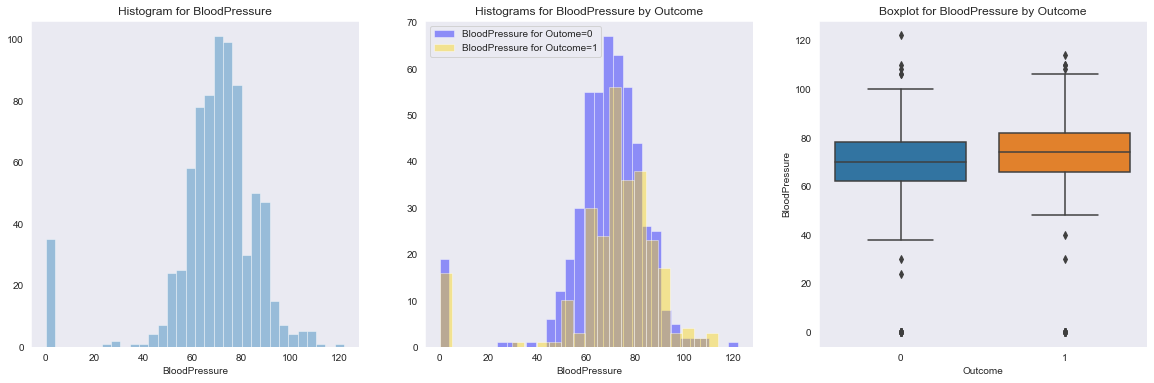

In [11]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.set_style("dark")
plt.title("Histogram for BloodPressure")
sns.distplot(dataset.BloodPressure,kde=False)
plt.subplot(1,3,2)
sns.distplot(dataset0.BloodPressure,kde=False,color="Blue", label="BloodPressure for Outome=0")
sns.distplot(dataset1.BloodPressure,kde=False,color = "Gold", label = "BloodPressure for Outcome=1")
plt.title("Histograms for BloodPressure by Outcome")
plt.legend()
plt.subplot(1,3,3)
sns.boxplot(x=dataset.Outcome,y=dataset.BloodPressure)
plt.title("Boxplot for BloodPressure by Outcome")

Text(0.5, 1.0, 'Boxplot of SkinThickness by Outcome')

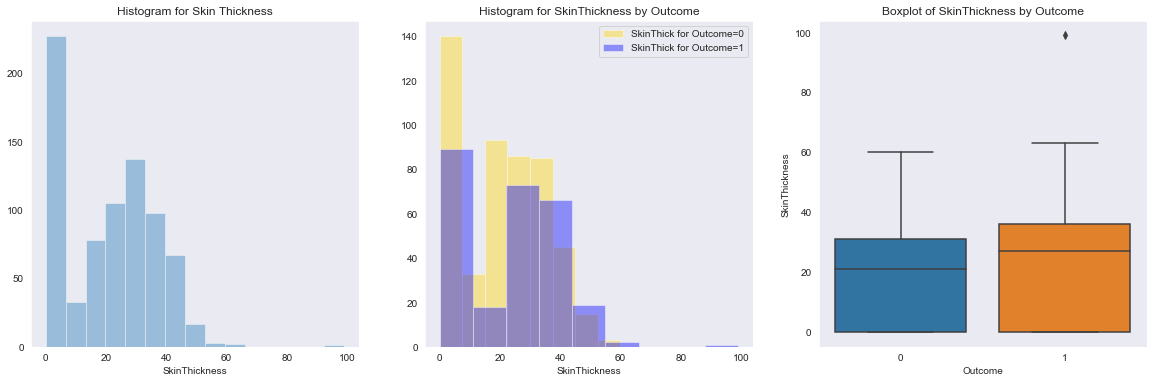

In [13]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(dataset.SkinThickness, kde=False)
plt.title("Histogram for Skin Thickness")
plt.subplot(1,3,2)
sns.distplot(dataset0.SkinThickness, kde=False, color="Gold", label="SkinThick for Outcome=0")
sns.distplot(dataset1.SkinThickness, kde=False, color="Blue", label="SkinThick for Outcome=1")
plt.legend()
plt.title("Histogram for SkinThickness by Outcome")
plt.subplot(1,3,3)
sns.boxplot(x=dataset.Outcome, y=dataset.SkinThickness)
plt.title("Boxplot of SkinThickness by Outcome")

Text(0.5, 1.0, 'Boxplot of Insulin by Outcome')

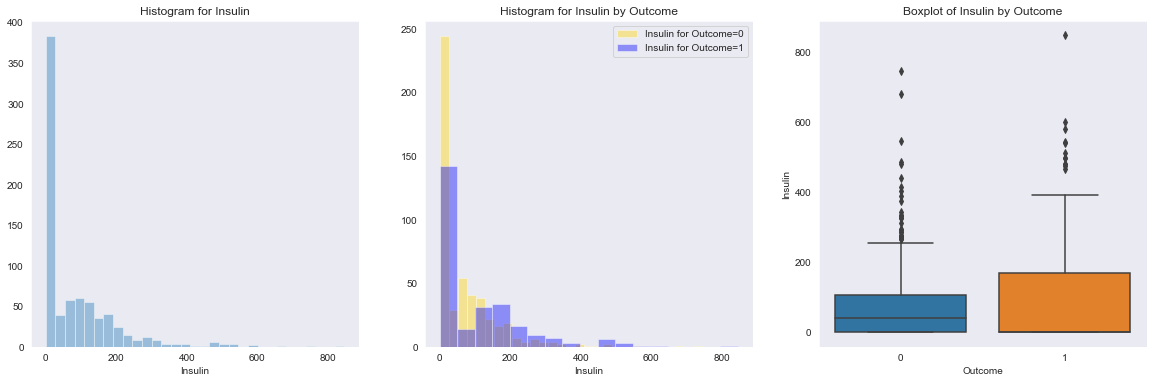

In [14]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(dataset.Insulin, kde=False)
plt.title("Histogram for Insulin")
plt.subplot(1,3,2)
sns.distplot(dataset0.Insulin, kde=False, color="Gold", label="Insulin for Outcome=0")
sns.distplot(dataset1.Insulin, kde=False, color="Blue", label="Insulin for Outcome=1")
plt.legend()
plt.title("Histogram for Insulin by Outcome")
plt.subplot(1,3,3)
sns.boxplot(x=dataset.Outcome, y=dataset.Insulin)
plt.title("Boxplot of Insulin by Outcome")

Text(0.5, 1.0, 'Boxplot of BMI by Outcome')

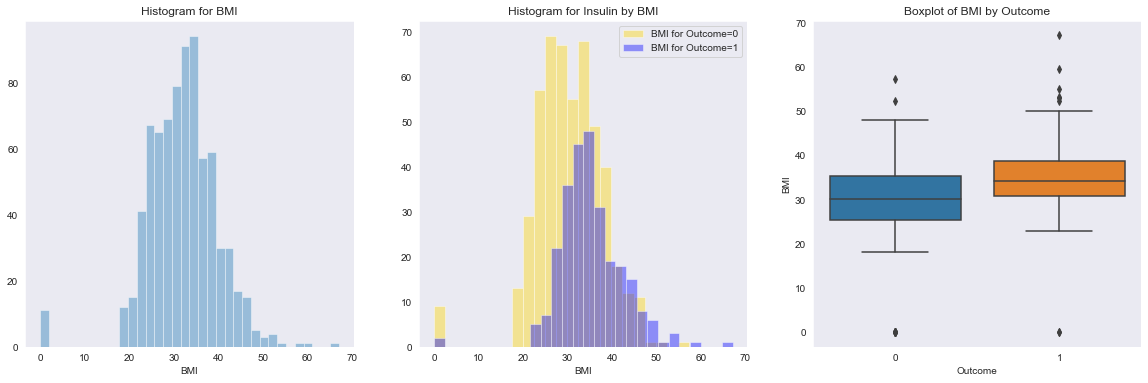

In [15]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(dataset.BMI, kde=False)
plt.title("Histogram for BMI")
plt.subplot(1,3,2)
sns.distplot(dataset0.BMI, kde=False, color="Gold", label="BMI for Outcome=0")
sns.distplot(dataset1.BMI, kde=False, color="Blue", label="BMI for Outcome=1")
plt.legend()
plt.title("Histogram for Insulin by BMI")
plt.subplot(1,3,3)
sns.boxplot(x=dataset.Outcome, y=dataset.BMI)
plt.title("Boxplot of BMI by Outcome")

Text(0.5, 1.0, 'Boxplot of DiabetesPedigreeFunction  by Outcome')

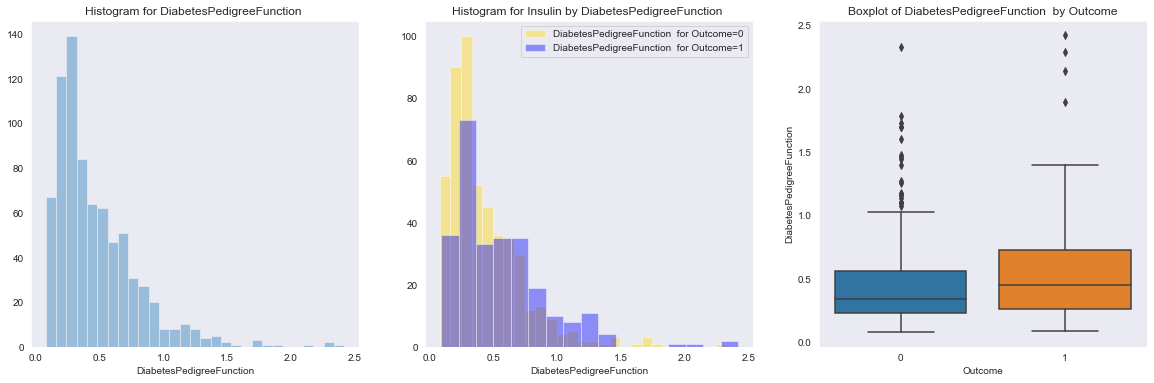

In [16]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(dataset.DiabetesPedigreeFunction , kde=False)
plt.title("Histogram for DiabetesPedigreeFunction ")
plt.subplot(1,3,2)
sns.distplot(dataset0.DiabetesPedigreeFunction , kde=False, color="Gold", label="DiabetesPedigreeFunction  for Outcome=0")
sns.distplot(dataset1.DiabetesPedigreeFunction , kde=False, color="Blue", label="DiabetesPedigreeFunction  for Outcome=1")
plt.legend()
plt.title("Histogram for Insulin by DiabetesPedigreeFunction ")
plt.subplot(1,3,3)
sns.boxplot(x=dataset.Outcome, y=dataset.DiabetesPedigreeFunction )
plt.title("Boxplot of DiabetesPedigreeFunction  by Outcome")

Text(0.5, 1.0, 'Boxplot of Age  by Outcome')

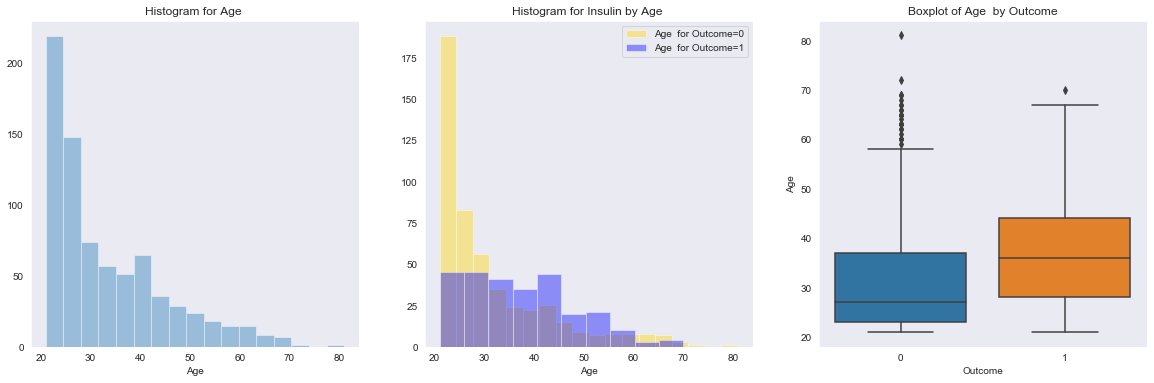

In [17]:
plt.figure(figsize=(20, 6))
plt.subplot(1,3,1)
sns.distplot(dataset.Age , kde=False)
plt.title("Histogram for Age ")
plt.subplot(1,3,2)
sns.distplot(dataset0.Age , kde=False, color="Gold", label="Age  for Outcome=0")
sns.distplot(dataset1.Age , kde=False, color="Blue", label="Age  for Outcome=1")
plt.legend()
plt.title("Histogram for Insulin by Age ")
plt.subplot(1,3,3)
sns.boxplot(x=dataset.Outcome, y=dataset.Age )
plt.title("Boxplot of Age  by Outcome")

# normality test

In [20]:
#importing stats module from scipy
from scipy import stats
## retrieving p value from normality test function
PregnanciesPVAL=stats.normaltest(dataset.Pregnancies).pvalue
GlucosePVAL=stats.normaltest(dataset.Glucose).pvalue
BloodPressurePVAL=stats.normaltest(dataset.BloodPressure).pvalue
SkinThicknessPVAL=stats.normaltest(dataset.SkinThickness).pvalue
InsulinPVAL=stats.normaltest(dataset.Insulin).pvalue
BMIPVAL=stats.normaltest(dataset.BMI).pvalue
DiaPeFuPVAL=stats.normaltest(dataset.DiabetesPedigreeFunction).pvalue
AgePVAL=stats.normaltest(dataset.Age).pvalue
## Printing the values
print("Pregnancies P Value is " + str(PregnanciesPVAL))
print("Glucose P Value is " + str(GlucosePVAL))
print("BloodPressure P Value is " + str(BloodPressurePVAL))
print("Skin Thickness P Value is " + str(SkinThicknessPVAL))
print("Insulin P Value is " + str(InsulinPVAL))
print("BMI P Value is " + str(BMIPVAL))
print("Diabetes Pedigree Function P Value is " + str(DiaPeFuPVAL))
print("Age P Value is " + str(AgePVAL))

Pregnancies P Value is 3.9142916387836715e-18
Glucose P Value is 0.0020446506991363502
BloodPressure P Value is 3.780127075543807e-67
Skin Thickness P Value is 0.00017124157678801767
Insulin P Value is 6.895342740914799e-85
BMI P Value is 1.9696869549260572e-19
Diabetes Pedigree Function P Value is 1.2987697487612696e-70
Age P Value is 9.308980038236578e-27


Text(0.5, 1, 'Pairplot of Variables by Outcome')

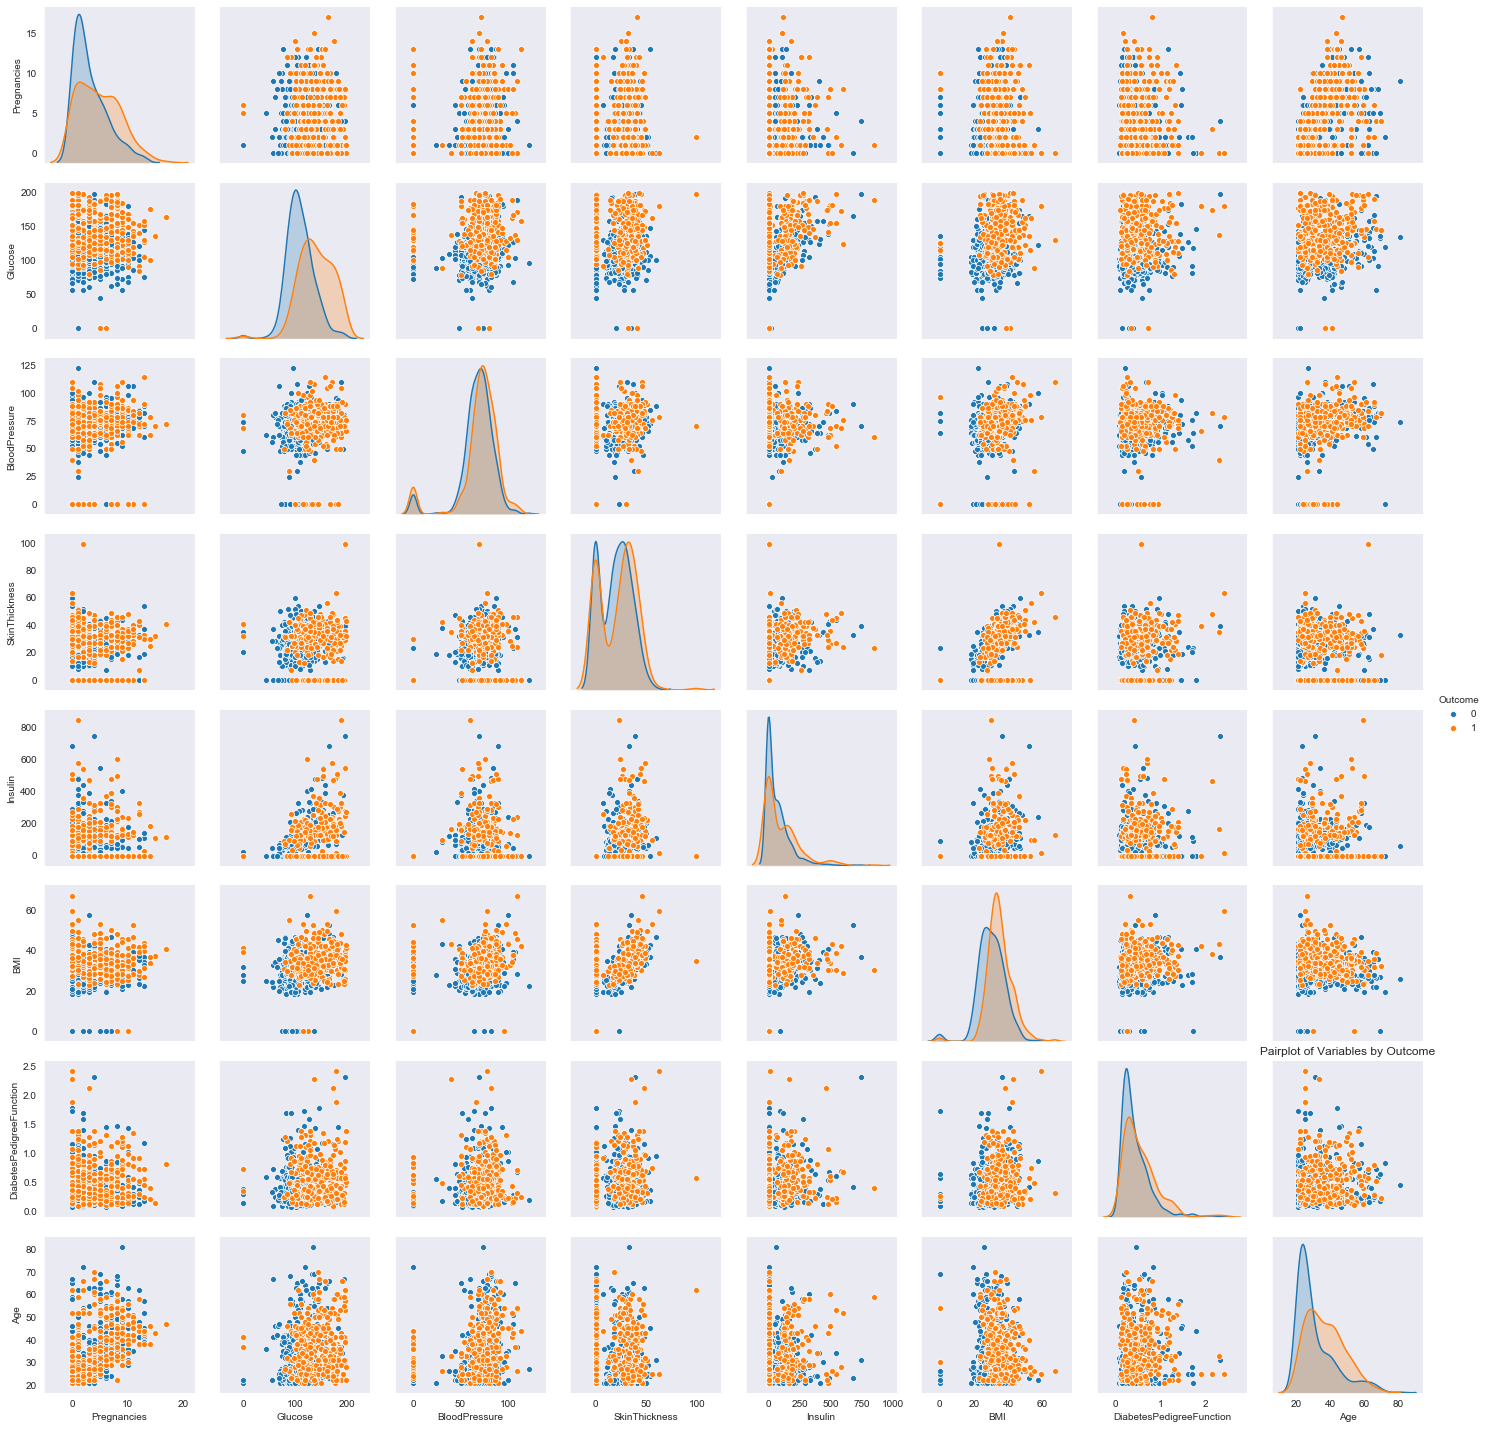

In [21]:
sns.pairplot(dataset, vars=["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"],hue="Outcome")
plt.title("Pairplot of Variables by Outcome")

In [22]:
cor = dataset.corr(method ='pearson')
cor

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


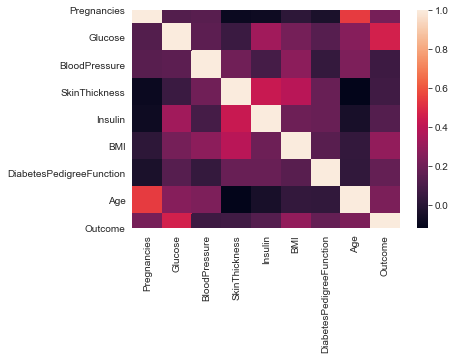

In [23]:
sns.heatmap(cor)


In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import KMeans
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


In [12]:
# Model Selection:
# Lets initialize the seven different classifier models with their default parameters and add them to a model 
#list as:
models = []
models.append(('KNN', KNeighborsClassifier()))
models.append(('SVC', SVC()))
models.append(('LR', LogisticRegression()))
models.append(('DT', DecisionTreeClassifier()))
#models.append(('GNB', GaussianNB()))
models.append(('RF', RandomForestClassifier()))
models.append(('GB', GradientBoostingClassifier()))
#models.append(('XGB', XGBClassifier()))

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
#import plotly.graph_objs as go
#import plotly.tools as tls
import os
import gc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier








import time
import random
import warnings
warnings.filterwarnings("ignore")
from math import *
import operator
import pandas as pd
import numpy as np
pd.set_option("display.max_columns", 10000)
import string
from pprint import pprint

# import plotting libraries
import matplotlib
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from matplotlib import style
%matplotlib inline 

import seaborn as sns
sns.set(style="white", color_codes=True)
sns.set(font_scale=1.5)

# load make_blobs to simulate data
from sklearn.datasets import make_blobs
from sklearn.datasets import make_classification

# import the ML algorithm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.cluster import KMeans
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import graphviz
from IPython.display import display


# pre-processing
from sklearn.preprocessing import Imputer
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV


# import libraries for model validation
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold 

# import libraries for metrics and reporting
from sklearn.linear_model import LogisticRegression

from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import adjusted_rand_score
from sklearn.model_selection import GridSearchCV
from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import pearsonr
import statistics


In [14]:
dataset = pd.read_csv('E:/diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [15]:
cols=["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"]
X=dataset[cols]
y=dataset.Outcome

In [16]:
from sklearn.model_selection import train_test_split 
y = dataset['Outcome']
X = dataset.drop(['Outcome'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)


In [17]:
# Fitting of each model and calculation the accuracy of the respective model using the "accuracy_Score". 
from sklearn.model_selection import train_test_split

names = []
scores = []
for name, model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    scores.append(accuracy_score(y_test, y_pred))
    names.append(name)
tr_split = pd.DataFrame({'Name': names, 'Score': scores})
print(tr_split)

  Name     Score
0  KNN  0.732283
1  SVC  0.669291
2   LR  0.791339
3   DT  0.688976
4   RF  0.791339
5   GB  0.763780


In [43]:
cols=["Pregnancies", "Glucose","BloodPressure","SkinThickness","Insulin", "BMI","DiabetesPedigreeFunction", "Age"]
X=dataset[cols]
y=dataset.Outcome

In [1]:
## Importing stats models for running logistic regression
import statsmodels.api as sm
## Defining the model and assigning Y (Dependent) and X (Independent Variables)
logit_model=sm.Logit(y,X)
## Fitting the model and publishing the results
result=logit_model.fit()
print(result.summary())

NameError: name 'y' is not defined

In [67]:
## Importing LogisticRegression from Sk.Learn linear model as stats model function cannot give us classification report and confusion matrix

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

logreg.fit(X,y)


## Defining the y_pred variable for the predicting values. I have taken 392 dia dataset. We can also take a test dataset
y_pred=logreg.predict(X)
## Calculating the precision of the model
from sklearn.metrics import classification_report
print(classification_report(y,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.90      0.84       500
           1       0.74      0.55      0.63       268

    accuracy                           0.78       768
   macro avg       0.76      0.72      0.74       768
weighted avg       0.77      0.78      0.77       768



In [70]:
print(accuracy_score(y_test,y_pred))


ValueError: Found input variables with inconsistent numbers of samples: [256, 768]

In [71]:


from sklearn.metrics import confusion_matrix
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=1/3, random_state=0) 

## Confusion matrix gives the number of cases where the model is able to accurately predict the outcomes.. both 1 and 0 and how many cases it gives false positive and false negatives
confusion_matrix = confusion_matrix(y, y_pred)
print(confusion_matrix)

[[448  52]
 [120 148]]


# Machine Learning


In [72]:
from sklearn.model_selection import train_test_split 
y = dataset['Outcome']
X = dataset.drop(['Outcome'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)
#Training and Prediction
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5) #menentukan nilai k(banyaknya tetangga terdekat yg menjadi acuan klasifikasi) 
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [73]:
#Prediction
y_pred = classifier.predict(X_test)
print(y_pred)

[1 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 0 1 1
 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 1 1 1 1 0 1 0 0 0 0 1
 1 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0
 0 1 0 1 1 0 1 0 1 1 1 0 0 0 0 0 1 1 1 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 0 0 0
 0 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 0 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 1 0 0 0 0 1 0 0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0]


In [74]:
#from pycm import *
from sklearn.metrics import confusion_matrix


In [75]:
y_actual1=y_test.tolist()
y_pred1=y_pred.tolist()

# K Neighbors Classifier


In [76]:
knn_scores = []
for k in range(1,21):
    knn_classifier = KNeighborsClassifier(n_neighbors = k)
    knn_classifier.fit(X_train, y_train)
    knn_scores.append(knn_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'K Neighbors Classifier scores for different K values')

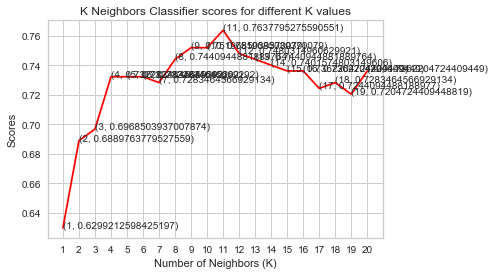

In [77]:
plt.plot([k for k in range(1, 21)], knn_scores, color = 'red')
for i in range(1,21):
    plt.text(i, knn_scores[i-1], (i, knn_scores[i-1]))
plt.xticks([i for i in range(1, 21)])
plt.xlabel('Number of Neighbors (K)')
plt.ylabel('Scores')
plt.title('K Neighbors Classifier scores for different K values')

From the plot above, it is clear that the maximum score achieved was 0.76 for the 11 neighbors.



In [78]:
print("The score for K Neighbors Classifier is {}% with {} nieghbors.".format(knn_scores[8]*100, 11))


The score for K Neighbors Classifier is 75.19685039370079% with 11 nieghbors.


In [79]:
classifier = KNeighborsClassifier(n_neighbors=11,p=2,metric='euclidean')


In [80]:
classifier.fit(X_train,y_train)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='euclidean',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [81]:
y_pred = classifier.predict(X_test)


In [82]:
conf_matrix = confusion_matrix(y_test,y_pred)
print(conf_matrix)
print(f1_score(y_test,y_pred))

[[149  21]
 [ 39  45]]
0.6


In [83]:
import datetime
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.manifold import TSNE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from xgboost import XGBClassifier
#import skopt
#from skopt import BayesSearchCV

from yellowbrick import ROCAUC
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport
#from eli5 import explain_weights
#from eli5.sklearn import PermutationImportance
#import eli5
#from lime import lime_tabular # via pip install git+https://github.com/marcotcr/lime.git

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [84]:
classifier.fit(X_train, y_train)
y_pred_proba = classifier.predict_proba(X_test) 

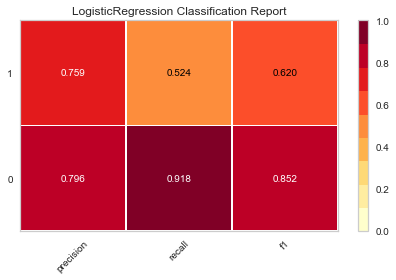

In [86]:
fig, ax = plt.subplots()
visualizer = ClassificationReport(logreg, classes=[0, 1], ax=ax)
ax.grid(False)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

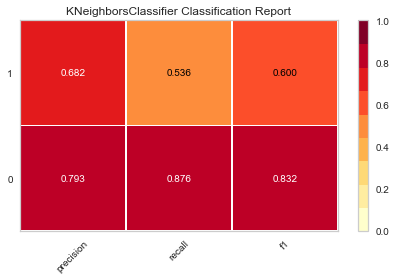

In [87]:
fig, ax = plt.subplots()
visualizer = ClassificationReport(classifier, classes=[0, 1], ax=ax)
ax.grid(False)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

In [88]:
print(accuracy_score(y_test,y_pred))


0.7637795275590551


In [89]:
from sklearn.svm import SVC
# Create a RandomForestClassifier object
svm_model = SVC(kernel='linear', C=1, random_state=42)

svm_model.fit(X_train, y_train.ravel())

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

In [90]:
#this returns array of predicted results
prediction_from_trained_data = svm_model.predict(X_train)

In [91]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)

print ("Accuracy of our SVM model is : {0:.4f}".format(accuracy))

Accuracy of our SVM model is : 0.7724


In [92]:
svm_predict_test = svm_model.predict(X_test)

#get accuracy
svm_accuracy_testdata = metrics.accuracy_score(y_test, svm_predict_test)

#print accuracy
print ("Accuracy: {0:.4f}".format(svm_accuracy_testdata))

Accuracy: 0.7874


In [93]:
import matplotlib.pyplot as plt



print ("Confusion Matrix for Support Vector Amchine")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, svm_predict_test, labels=[1, 0])))

print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, svm_predict_test, labels=[1, 0])))

Confusion Matrix for Support Vector Amchine
[[ 46  38]
 [ 16 154]]

Classification Report

              precision    recall  f1-score   support

           1       0.74      0.55      0.63        84
           0       0.80      0.91      0.85       170

    accuracy                           0.79       254
   macro avg       0.77      0.73      0.74       254
weighted avg       0.78      0.79      0.78       254



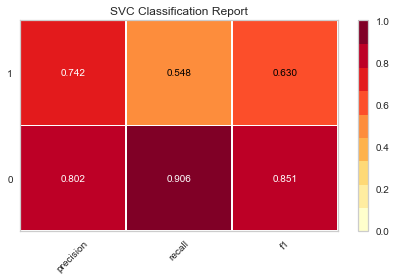

In [94]:
fig, ax = plt.subplots()
visualizer = ClassificationReport(svm_model, classes=[0, 1], ax=ax)
ax.grid(False)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

In [95]:
from sklearn.svm import SVC
# Create a RandomForestClassifier object
svm_model = SVC(kernel='linear', C=1, random_state=42)

svm_model.fit(X_train, y_train.ravel())

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='linear', max_iter=-1, probability=False, random_state=42,
    shrinking=True, tol=0.001, verbose=False)

In [96]:
# this returns array of predicted results
prediction_from_trained_data = svm_model.predict(X_train)

In [97]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)

print ("Accuracy of our SVM model is : {0:.4f}".format(accuracy))

Accuracy of our SVM model is : 0.7724


In [98]:
svm_predict_test = svm_model.predict(X_test)

#get accuracy
svm_accuracy_testdata = metrics.accuracy_score(y_test, svm_predict_test)

#print accuracy
print ("Accuracy: {0:.4f}".format(svm_accuracy_testdata))

Accuracy: 0.7874


In [99]:

print ("Confusion Matrix for Support Vector Amchine")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, svm_predict_test, labels=[1, 0])))

print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, svm_predict_test, labels=[1, 0])))

Confusion Matrix for Support Vector Amchine
[[ 46  38]
 [ 16 154]]

Classification Report

              precision    recall  f1-score   support

           1       0.74      0.55      0.63        84
           0       0.80      0.91      0.85       170

    accuracy                           0.79       254
   macro avg       0.77      0.73      0.74       254
weighted avg       0.78      0.79      0.78       254



In [100]:
clf.fit(X_train, y_train)
y_pred_proba = clf.predict_proba(X_test)

NameError: name 'clf' is not defined

# Support Vector Classifier


In [ ]:
svc_scores = []
kernels = ['linear', 'poly', 'rbf', 'sigmoid']
for i in range(len(kernels)):
    svc_classifier = SVC(kernel = kernels[i])
    svc_classifier.fit(X_train, y_train)
    svc_scores.append(svc_classifier.score(X_test, y_test))

In [ ]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')

In [ ]:
colors = rainbow(np.linspace(0, 1, len(kernels)))
plt.bar(kernels, svc_scores, color = colors)
for i in range(len(kernels)):
    plt.text(i, svc_scores[i], svc_scores[i])
plt.xlabel('Kernels')
plt.ylabel('Scores')
plt.title('Support Vector Classifier scores for different kernels')
##################### with best kernel 
clf=SVC(kernel ='rbf')
clf.fit(X_train,y_train)
clf = CalibratedClassifierCV(clf, method="sigmoid")
clf.fit(X_train, y_train)
predict_y=clf.predict_proba(X_test)
print("The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
#########Plot confusion atrix
print(len(predict_y))
print(len(y_test))
plot_confusion_matrix(y_test, clf.predict(X_test))



In [ ]:
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
x_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [ ]:
# Create Decision Tree classifer object
model = DecisionTreeClassifier()

# Train Decision Tree Classifer
model = model.fit(x_train,y_train)

#Predict the response for test dataset
y_pred = model.predict(x_test)

In [ ]:
#Evaluation using Accuracy score
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
print("Accuracy:",metrics.accuracy_score(y_test, y_pred)*100)

In [ ]:

#Evaluation using Confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

In [ ]:

print ("Confusion Matrix for DT")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, dt_predict_test, labels=[1, 0])))

print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, dt_predict_test, labels=[ 1,0])))

In [ ]:
#Evaluation using Classification report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

In [ ]:
#Import modules for Visualizing Decision trees
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
import os
os.environ 

In [ ]:
features=X.columns
features

# Decision Tree Classifier


In [ ]:
from sklearn.tree import DecisionTreeClassifier

# create Gaussian Naive Bayes model object and train it with the data
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train.ravel())

In [ ]:
# this returns array of predicted results
prediction_from_trained_data = dt_model.predict(X_train)

In [ ]:
from sklearn import metrics

accuracy = metrics.accuracy_score(y_train, prediction_from_trained_data)

print ("Accuracy of our DT model is : {0:.4f}".format(accuracy))

In [ ]:
dt_predict_test = dt_model.predict(X_test)

#get accuracy
dt_accuracy_testdata = metrics.accuracy_score(y_test, dt_predict_test)

#print accuracy
print ("Accuracy: {0:.4f}".format(dt_accuracy_testdata))

In [78]:

print ("Confusion Matrix for DT")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.confusion_matrix(y_test, dt_predict_test, labels=[1, 0])))

print ("")

print ("Classification Report\n")

# labels for set 1=True to upper left and 0 = False to lower right
print ("{0}".format(metrics.classification_report(y_test, dt_predict_test, labels=[ 1,0])))

Confusion Matrix for DT
[[ 45  40]
 [ 40 131]]

Classification Report

              precision    recall  f1-score   support

           1       0.53      0.53      0.53        85
           0       0.77      0.77      0.77       171

    accuracy                           0.69       256
   macro avg       0.65      0.65      0.65       256
weighted avg       0.69      0.69      0.69       256



In [3]:
import datetime
import pandas as pd
import seaborn as sns
import numpy as np
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.dummy import DummyClassifier
from sklearn.manifold import TSNE
from sklearn.metrics import roc_auc_score
from sklearn.metrics import make_scorer
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import learning_curve
from xgboost import XGBClassifier
#import skopt
#from skopt import BayesSearchCV

from yellowbrick import ROCAUC
from yellowbrick.classifier import ConfusionMatrix, ClassificationReport
#from eli5 import explain_weights
#from eli5.sklearn import PermutationImportance
#import eli5
#from lime import lime_tabular # via pip install git+https://github.com/marcotcr/lime.git

import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split 
dataset = pd.read_csv('E:/diabetes.csv')
dataset.head()
y = dataset['Outcome']
X = dataset.drop(['Outcome'], axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0)


# create Gaussian Naive Bayes model object and train it with the data
dt_model = DecisionTreeClassifier(random_state=42)

dt_model.fit(X_train, y_train.ravel())

DecisionTreeClassifier(random_state=42)

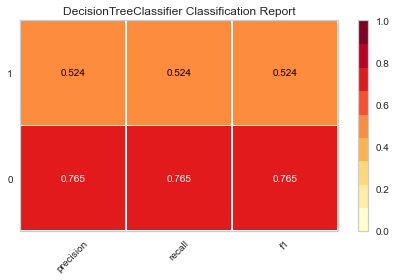

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
visualizer = ClassificationReport(dt_model, classes=[0, 1], ax=ax)
ax.grid(False)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

In [11]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

Text(0.5, 1.0, 'Decision Tree Classifier scores for different number of maximum features')

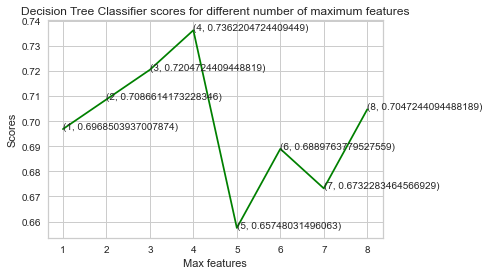

In [12]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')

In [13]:
dt_scores = []
for i in range(1, len(X.columns) + 1):
    dt_classifier = DecisionTreeClassifier(max_features = i, random_state = 0)
    dt_classifier.fit(X_train, y_train)
    dt_scores.append(dt_classifier.score(X_test, y_test))

ValueError: max_features must be in (0, n_features]

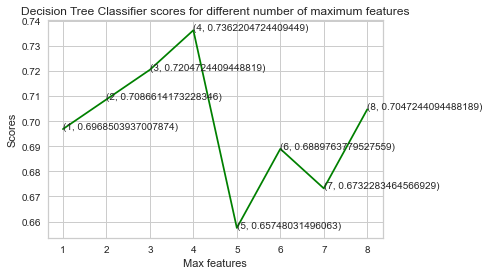

In [14]:
plt.plot([i for i in range(1, len(X.columns) + 1)], dt_scores, color = 'green')
for i in range(1, len(X.columns) + 1):
    plt.text(i, dt_scores[i-1], (i, dt_scores[i-1]))
plt.xticks([i for i in range(1, len(X.columns) + 1)])
plt.xlabel('Max features')
plt.ylabel('Scores')
plt.title('Decision Tree Classifier scores for different number of maximum features')
clf=DecisionTreeClassifier(max_features = 10, random_state = 0)
clf.fit(X_train,y_train)
clf = CalibratedClassifierCV(clf, method="sigmoid")
clf.fit(X_train, y_train)
predict_y=clf.predict_proba(X_test)
print("The log loss is:",log_loss(y_test, predict_y, labels=clf.classes_, eps=1e-15))
#########Plot confusion atrix
print(len(predict_y))
#print(len(y_test))
plot_confusion_matrix(y_test, clf.predict(X_test))
plt.show()

# Random Forest Classifier

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
from matplotlib.cm import rainbow
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=100) 
rf_model.fit(X_train,y_train.ravel())


RandomForestClassifier(random_state=100)

In [17]:

rf_predict_test = rf_model.predict(X_test)
print("Accuracy:{0:.4f}".format(metrics.accuracy_score(y_test,rf_predict_test)))
print()

NameError: name 'metrics' is not defined

In [18]:
print("Confusion Matrix for Random Forest")
print(metrics.confusion_matrix(y_test, rf_predict_test) )
print("")

print("Classification Report")
print(metrics.classification_report(y_test, rf_predict_test))

Confusion Matrix for Random Forest


NameError: name 'metrics' is not defined

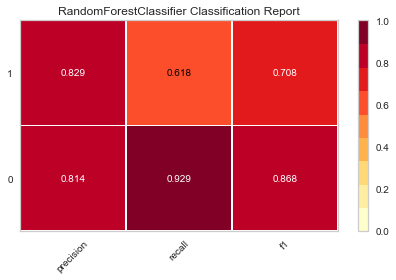

In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
visualizer = ClassificationReport(rf_model, classes=[0, 1], ax=ax)
ax.grid(False)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

In [130]:
from xgboost import XGBClassifier

# fit model to training data
xgb_model = XGBClassifier(random_state = 0 )
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [131]:
y_predxgb = xgb_model.predict(X_test)

xgb_ac = accuracy_score(y_test, y_predxgb)
xgb_fscore = f1_score(y_test ,y_predxgb)


In [134]:
xgb_predict_test = xgb_model.predict(X_test)
print("Accuracy:{0:.4f}".format(metrics.accuracy_score(y_test,rf_predict_test)))
print()

Accuracy:0.7792



In [135]:

print("Confusion Matrix for XGBoost")
print (metrics.confusion_matrix(y_test,y_predxgb))

print("")

print("Classification Report")
print(metrics.classification_report(y_test, xgb_predict_test))

Confusion Matrix for XGBoost
[[81 18]
 [20 35]]

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        99
           1       0.66      0.64      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [ ]:
from sklearn.datasets import make_classification
from sklearn.ensemble import GradientBoostingClassifier
# define the model
model = GradientBoostingClassifier()
# fit the model on the whole dataset
model.fit(X, y)


In [137]:
y_predgbm = model.predict(X_test)

from sklearn.metrics import accuracy_score

ac_gbm= accuracy_score(y_test,y_predgbm)
print ('gradiant boost Accuracy : ', ac_gbm)

gradiant boost Accuracy :  0.9415584415584416


In [140]:
gb_predict_test = model.predict(X_test)


In [141]:
print (metrics.confusion_matrix(y_test,y_predgbm))
print("Confusion Matrix for Gradiant Boost")

print("")

print("Classification Report")
print(metrics.classification_report(y_test, gb_predict_test))

[[96  3]
 [ 6 49]]
Confusion Matrix for Gradiant Boost

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.97      0.96        99
           1       0.94      0.89      0.92        55

    accuracy                           0.94       154
   macro avg       0.94      0.93      0.94       154
weighted avg       0.94      0.94      0.94       154



In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
visualizer = ClassificationReport(rf_model, classes=[0, 1], ax=ax)
ax.grid(False)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
g = visualizer.poof()             # Draw/show/poof the data

In [129]:
import xgboost as xgb
from sklearn.metrics import log_loss

from sklearn.calibration import CalibratedClassifierCV
from xgboost import XGBClassifier
import numpy as np


params = {}
params['objective'] = 'binary:logistic'
params['eval_metric'] = 'logloss'
params['eta'] = 0.02
params['max_depth'] = 4
d_train = xgb.DMatrix(X_train, label=y_train)
d_test = xgb.DMatrix(X_test, label=y_test)
watchlist = [(d_train, 'train'), (d_test, 'valid')]
bst = xgb.train(params, d_train, 400, watchlist, early_stopping_rounds=20, verbose_eval=10)
xgdmat = xgb.DMatrix(X_train,y_train)
predict_y = bst.predict(d_test)
print("The test log loss is:",log_loss(y_test, predict_y,  eps=1e-15))
print(len(predict_y))
#print(len(y_test))
confusion_matrix(y_test, clf.predict(X_test))




[0]	train-logloss:0.68481	valid-logloss:0.68521
Multiple eval metrics have been passed: 'valid-logloss' will be used for early stopping.

Will train until valid-logloss hasn't improved in 20 rounds.
[10]	train-logloss:0.61601	valid-logloss:0.62125
[20]	train-logloss:0.56411	valid-logloss:0.57718
[30]	train-logloss:0.52416	valid-logloss:0.54543
[40]	train-logloss:0.49231	valid-logloss:0.52025
[50]	train-logloss:0.46684	valid-logloss:0.50170
[60]	train-logloss:0.44547	valid-logloss:0.48641
[70]	train-logloss:0.42699	valid-logloss:0.47453
[80]	train-logloss:0.41154	valid-logloss:0.46557
[90]	train-logloss:0.39761	valid-logloss:0.46024
[100]	train-logloss:0.38538	valid-logloss:0.45722
[110]	train-logloss:0.37502	valid-logloss:0.45509
[120]	train-logloss:0.36502	valid-logloss:0.45400
[130]	train-logloss:0.35618	valid-logloss:0.45337
[140]	train-logloss:0.34854	valid-logloss:0.45241
[150]	train-logloss:0.34179	valid-logloss:0.45196
[160]	train-logloss:0.33602	valid-logloss:0.45032
[170]	trai

TypeError: ('Expecting data to be a DMatrix object, got: ', <class 'pandas.core.frame.DataFrame'>)

In [ ]:
dataset.head()